<a href="https://colab.research.google.com/github/jdomeneghini/Data_Science/blob/master/Projeto_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Análise Exploratória de Dados - Doenças Cardiovasculares**

*Este projeto foi desenvolvido no curso Data Science na Prática e este notebook trata-se de uma análise de dados sobre diagnósticos de paciente com doenças cardíacas.*


Segundo a Organização Mundial da Saude, as doenças cardiovasculares são as principais causas de morte no mundo.

Atualmente existem diversas pesquisas utilizando inteligência artificial para prever diagnósticos precoces e capazes de identificar a doença com pelo menos cinco anos de antecedência.

Com isso, podemos ver como a tecnologia pode impactar positivamente a área da saude, contribuindo com diagnósticos seguros e eficazes afim de aumentar a vitalidade de muitos pacientes. 



### **Obtenção dos Dados**

Os dados obtidos se encontram disponível no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease) e foram coletados pela ***Cleveland Clinic Foundation*** . Importante informar que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* contém 303 registros de pacientes e 14 atributos e pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

Será também utilizado um *dataset* secundário para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).


**Importando as bibliotecas e o DataFrame**


In [0]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo o DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv')

df_brasil= pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv")


**Informações sobre os atributos:**


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depressão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

**Efetuando correção da coluna 'Num' do DataFrame**

A variável 'num' é onde indica o diagnóstico de doença cardiaca. Ela possui valores 1, 2, 3 e 4 que indicam que há doença cardiáca. Iremos converter esses valores como sendo somente 1.

In [15]:
#variavel alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
#converter valores >=1 em 1

df.loc[df.num !=0, 'num']= 1

In [17]:
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

### **Análise Exploratória dos Dados**

**1. Qual o tamanho do DataFrame?**

In [0]:
df.shape

(303, 14)

O DataFrame possui 303 registros e 14 colunas

**2. Quais as informações estatísticas podemos extrair deste df?**

In [0]:
#Informações estatisticas do DF
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


**3. Quais os tipos das varíaveis?**

In [0]:
#Tipos das variavies
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

**4. Quais os 5 primeiros registros do df?**

In [0]:
#5 primeiros registros

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**5. Existem váriavies nulas?**

In [0]:
#Quantos valores ausentes presentes no DF
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

O df não apresenta valores ausentes (nulos).

**6. Casos no Brasil**

Analisando dados referente aos casos no Brasil.


In [0]:
df_brasil

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672
5,2012,333.295
6,2011,335.213
7,2010,326.371
8,2009,320.074
9,2008,317.797


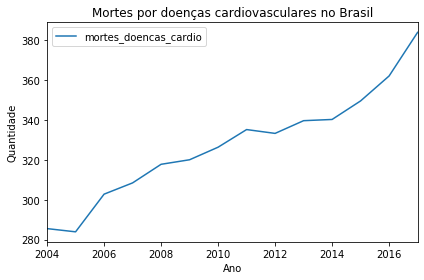

In [0]:
fig, ax= plt.subplots()

df_brasil.plot('ano', 'mortes_doencas_cardio', ax=ax)
ax.set_title('Mortes por doenças cardiovasculares no Brasil')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
plt.tight_layout();

Este gráfico representa o crescimento do número de mortes no Brasil entre os anos de 2004 a 2016, devido a doenças cardiovasculares.



**7. Quantidade de homens e mulheres diagnosticados com doença cardíaca**

In [77]:
df_diag= df.loc[df.num == 1]

print('Mulheres: {}'.format(df_diag.sex.value_counts()[0]))
print('Homens: {}'.format(df_diag.sex.value_counts()[1]))

Mulheres: 25
Homens: 114


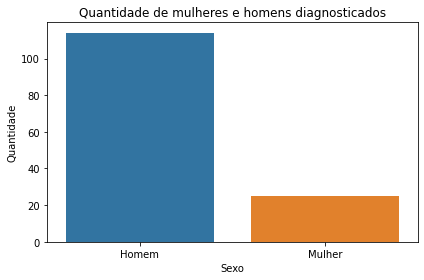

In [75]:
fig, ax= plt.subplots()

sns.barplot(x= ['Homem', 'Mulher'], y = df_diag.sex.value_counts())
ax.set_title('Quantidade de mulheres e homens diagnosticados')
ax.set_xlabel('Sexo')
ax.set_ylabel('Quantidade')

plt.tight_layout();


Este gráfico representa a quantidade de homens e mulheres nos quais foram diagnosticados com doença cardiovascular. Como podemos notar, a maioria dos casos de doenças foram diagnosticadas em Homens.

**8. Idades de homens e mulheres diagnosticados com doenças cardiovasculares**

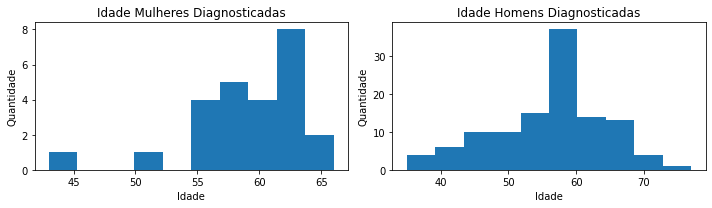

In [141]:
idade_mulheres= df_diag.loc[df.sex == 0]
idade_homens= df_diag.loc[df.sex ==1]

fig, (ax1, ax2)= plt.subplots(nrows= 1, ncols=2, figsize=(10,3))

idade_mulheres.age.plot(kind='hist', ax=ax1)
ax1.set_title('Idade Mulheres Diagnosticadas')
ax1.set_xlabel('Idade')
ax1.set_ylabel('Quantidade')

idade_homens.age.plot(kind='hist', ax=ax2)
ax2.set_title('Idade Homens Diagnosticadas')
ax2.set_xlabel('Idade')
ax2.set_ylabel('Quantidade')

plt.tight_layout();



**9. Disperção do nível de colesterol de acordo com as idades**

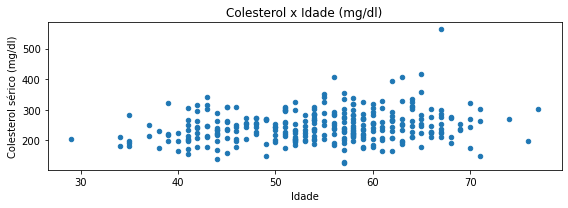

In [79]:
fig, ax= plt.subplots(figsize=(8,3))

df.plot.scatter(x='age', y='chol', ax=ax)
ax.set_title('Colesterol x Idade (mg/dl)')
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol sérico (mg/dl)')
plt.tight_layout()

O gráfico acima compara os registros de volume do colesterol sérico de acordo com as idades.

**10. Indice Colesterol Sérico**

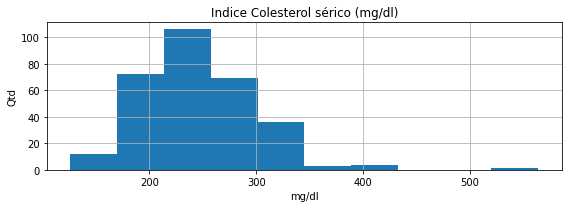

In [0]:
fig, ax= plt.subplots(figsize=(8,3))

df.chol.hist(ax=ax)
ax.set_title('Indice Colesterol sérico (mg/dl)')
ax.set_xlabel('mg/dl')
ax.set_ylabel('Qtd')
plt.tight_layout()

**11. Eletrocardiografia de repouso**

Este exame possui três tipos de resultados:



*  0: normal
*  1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
* 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

No gráfico abaixo é possível identificarmos em qual frequência esses resultados ocorrem.



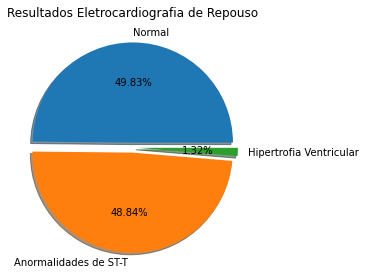

In [102]:
labels = ['Normal'.format(df.restecg.value_counts()[0]), 
          'Anormalidades de ST-T'.format(df.restecg.value_counts()[1]),
          'Hipertrofia Ventricular'.format(df.restecg.value_counts()[2])
          ]
fig, ax= plt.subplots()

ax.pie(df.restecg.value_counts(), autopct='%1.2f%%', explode= (0.05, 0.05, 0.05), labels= labels, shadow=True)
ax.set_title('Resultados Eletrocardiografia de Repouso')

plt.tight_layout()

**12. Verificando correlação entre as variáveis**

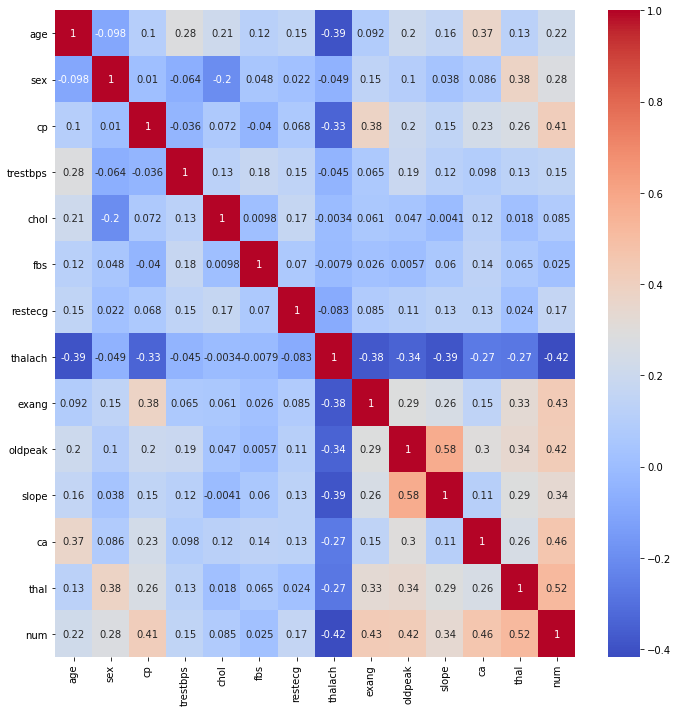

In [0]:
fig, ax= plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), annot= True, ax=ax, cmap='coolwarm')

plt.tight_layout()


A váriavel que mais possui uma correlação neste caso é a 'oldpeak' (depressão do segmento ST induzida pelo exercício em relação ao repouso) e 'slope' (inclinação do segmento ST no pico do exercício).

